In [1]:
import requests
import tarfile
from os import path
import pandas as pd 
import seaborn as sns
import numpy as np

In [2]:
def darkgrid():
    sns.set_style('darkgrid')

In [3]:
# Downloading the dataset

#fname = 'airline.tar.gz'
#url = 'https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/' + fname
#r = requests.get(url)
#open(fname , 'wb').write(r.content)

In [4]:
# Extracting the dataset
#tar = tarfile.open(fname)
#tar.extractall()
#tar.close()

In [5]:
# Verifying the file was extracted properly
data_path = "airline.csv"
path.exists(data_path)

True

In [ ]:
# load dataset into notebook
# Load the Pandas libraries with alias 'pd' 

#df = pd.read_csv(data_path, encoding = "ISO-8859-1",
#                 dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str},low_memory = False)
# Preview the first 5 lines of the loaded data 
#df = pd.concat(df)
#df_chunk = df.get_chunk(10)
#df.head()

chunk_size=10000000
batch_no=1
for chunk in pd.read_csv(data_path, encoding = "ISO-8859-1",dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str}, chunksize=chunk_size):
    nan_value = float("NaN")
    chunk.replace(" ", nan_value, inplace=True)
    chunk.dropna(how='all', axis=1, inplace=True)
    chunk.to_csv('chunk'+str(batch_no)+'.csv',index=False)
    batch_no+=1
    
#df1 = pd.read_csv('chunk1.csv')
#df1.head()

In [85]:
df1 = pd.read_csv('chunk1.csv')
df1.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance,DistanceGroup
0,1987,4,10,30,5,1987-10-30,PS,19391,PS,1442,...,0.0,0.0,1000-1059,0.0,0.0,63.0,70.0,1.0,325.0,2
1,1987,4,10,31,6,1987-10-31,PS,19391,PS,1442,...,0.0,0.0,1000-1059,0.0,0.0,63.0,70.0,1.0,325.0,2
2,1987,4,10,1,4,1987-10-01,PS,19391,PS,1443,...,NaN,NaN,0900-0959,1.0,0.0,63.0,NaN,1.0,297.0,2
3,1987,4,10,2,5,1987-10-02,PS,19391,PS,1443,...,0.0,0.0,0900-0959,0.0,0.0,63.0,61.0,1.0,297.0,2
4,1987,4,10,3,6,1987-10-03,PS,19391,PS,1443,...,0.0,0.0,0900-0959,0.0,0.0,63.0,60.0,1.0,297.0,2


In [86]:
df2 = pd.read_csv('chunk2.csv')
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance,DistanceGroup
0,1989,2,6,19,1,1989-06-19,WN,19393,WN,746,...,0.0,0.0,2100-2159,0.0,0.0,55.0,52.0,1.0,255.0,2
1,1989,2,6,20,2,1989-06-20,WN,19393,WN,746,...,0.0,-1.0,2100-2159,0.0,0.0,55.0,51.0,1.0,255.0,2
2,1989,2,6,21,3,1989-06-21,WN,19393,WN,746,...,0.0,-1.0,2100-2159,0.0,0.0,55.0,53.0,1.0,255.0,2
3,1989,2,6,22,4,1989-06-22,WN,19393,WN,746,...,0.0,0.0,2100-2159,0.0,0.0,55.0,50.0,1.0,255.0,2
4,1989,2,6,23,5,1989-06-23,WN,19393,WN,746,...,0.0,-1.0,2100-2159,0.0,0.0,55.0,53.0,1.0,255.0,2


In [8]:
df = pd.concat([df1,df2])

In [9]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance,DistanceGroup
0,1987,4,10,30,5,1987-10-30,PS,19391,PS,1442,...,0.0,0.0,1000-1059,0.0,0.0,63.0,70.0,1.0,325.0,2
1,1987,4,10,31,6,1987-10-31,PS,19391,PS,1442,...,0.0,0.0,1000-1059,0.0,0.0,63.0,70.0,1.0,325.0,2
2,1987,4,10,1,4,1987-10-01,PS,19391,PS,1443,...,NaN,NaN,0900-0959,1.0,0.0,63.0,NaN,1.0,297.0,2
3,1987,4,10,2,5,1987-10-02,PS,19391,PS,1443,...,0.0,0.0,0900-0959,0.0,0.0,63.0,61.0,1.0,297.0,2
4,1987,4,10,3,6,1987-10-03,PS,19391,PS,1443,...,0.0,0.0,0900-0959,0.0,0.0,63.0,60.0,1.0,297.0,2


# Data Wrangling

In [10]:
# List new column names
df.info(verbose=True, null_counts=True)

/var/folders/rw/w8zrfd114mq4bld0cqdkdg6w0000gn/T/ipykernel_6317/3088683054.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491855 entries, 0 to 5491854
Data columns (total 49 columns):
 #   Column                           Non-Null Count     Dtype  
---  ------                           --------------     -----  
 0   Year                             15491855 non-null  int64  
 1   Quarter                          15491855 non-null  int64  
 2   Month                            15491855 non-null  int64  
 3   DayofMonth                       15491855 non-null  int64  
 4   DayOfWeek                        15491855 non-null  int64  
 5   FlightDate                       15491855 non-null  object 
 6   Reporting_Airline                15491855 non-null  object 
 7   DOT_ID_Reporting_Airline         15491855 non-null  int64  
 8   IATA_CODE_Reporting_Airline      15491855 non-null  object 
 9   Flight_Number_Reporting_Airline  15491855 non-null  int64  
 10  OriginAirportID                  15491855 non-null  int64  
 11  OriginAirportSeqID               154

In [11]:
df = df.drop(columns=['Quarter', 'Reporting_Airline',
                 'IATA_CODE_Reporting_Airline','Flight_Number_Reporting_Airline',
                 'Origin','OriginAirportSeqID','OriginCityMarketID',
                 'OriginCityName','OriginState','OriginStateFips','OriginStateName',
                 'OriginWac','Dest','DestAirportSeqID','DestCityMarketID',
                 'DestCityName','DestState','DestStateFips','DestStateName','DestWac',
                 'DepDelayMinutes','DepDel15','DepartureDelayGroups','DepTimeBlk',
                 'ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ArrTimeBlk','DistanceGroup'])

In [12]:
df.info(verbose=True, null_counts=True)

/var/folders/rw/w8zrfd114mq4bld0cqdkdg6w0000gn/T/ipykernel_6317/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491855 entries, 0 to 5491854
Data columns (total 20 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   Year                      15491855 non-null  int64  
 1   Month                     15491855 non-null  int64  
 2   DayofMonth                15491855 non-null  int64  
 3   DayOfWeek                 15491855 non-null  int64  
 4   FlightDate                15491855 non-null  object 
 5   DOT_ID_Reporting_Airline  15491855 non-null  int64  
 6   OriginAirportID           15491855 non-null  int64  
 7   DestAirportID             15491855 non-null  int64  
 8   CRSDepTime                15491855 non-null  int64  
 9   DepTime                   15305033 non-null  float64
 10  DepDelay                  15305033 non-null  float64
 11  CRSArrTime                15491855 non-null  int64  
 12  ArrTime                   15259632 non-null  float64
 13  ArrDelay   

In [13]:
df['Year'].value_counts()

1988    5202096
1989    5041200
1990    3936733
1987    1311826
Name: Year, dtype: int64

In [14]:
# overview of data shape and composition
print(f'Shape:\n{df.shape}\n')

Shape:
(15491855, 20)



In [15]:
# Renaming the numeric values to categorical in columns Cancelled and Diverted 
df['Cancelled'] = df['Cancelled'].replace([1, 0], ["Cancelled", "Not Cancelled"])
df['Diverted'] = df['Diverted'].replace([1, 0], ["Diverted", "Not Diverted"])

In [16]:
# replacing 'day of week' values
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
df['DayOfWeek'].replace(day, inplace=True)

In [17]:
# Set day order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
day_order = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['DayOfWeek'] = df['DayOfWeek'].astype(day_order);

In [ ]:
# Confirm order
df['DayOfWeek'].unique()

In [18]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance
0,1987,10,30,Friday,1987-10-30,19391,13796,10800,937,936.0,-1.0,1040,1046.0,6.0,Not Cancelled,Not Diverted,63.0,70.0,1.0,325.0
1,1987,10,31,Saturday,1987-10-31,19391,13796,10800,937,936.0,-1.0,1040,1046.0,6.0,Not Cancelled,Not Diverted,63.0,70.0,1.0,325.0
2,1987,10,1,Thursday,1987-10-01,19391,10800,14831,855,NaN,NaN,958,NaN,NaN,Cancelled,Not Diverted,63.0,NaN,1.0,297.0
3,1987,10,2,Friday,1987-10-02,19391,10800,14831,855,858.0,3.0,958,959.0,1.0,Not Cancelled,Not Diverted,63.0,61.0,1.0,297.0
4,1987,10,3,Saturday,1987-10-03,19391,10800,14831,855,859.0,4.0,958,959.0,1.0,Not Cancelled,Not Diverted,63.0,60.0,1.0,297.0


In [19]:
#Converting time values format

# validating null values in actual_dep_time
df[df['DepTime'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance
2,1987,10,1,Thursday,1987-10-01,19391,10800,14831,855,NaN,NaN,958,NaN,NaN,Cancelled,Not Diverted,63.0,NaN,1.0,297.0
53,1987,10,29,Thursday,1987-10-29,19391,10800,13796,1145,NaN,NaN,1253,NaN,NaN,Cancelled,Not Diverted,68.0,NaN,1.0,325.0
181,1987,10,12,Monday,1987-10-12,19391,10800,13796,1505,NaN,NaN,1608,NaN,NaN,Cancelled,Not Diverted,63.0,NaN,1.0,325.0
208,1987,10,12,Monday,1987-10-12,19391,13796,10800,1635,NaN,NaN,1732,NaN,NaN,Cancelled,Not Diverted,57.0,NaN,1.0,325.0
227,1987,10,6,Tuesday,1987-10-06,19391,12892,14771,830,NaN,NaN,937,NaN,NaN,Cancelled,Not Diverted,67.0,NaN,1.0,337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491110,1990,7,18,Wednesday,1990-07-18,19805,11433,13930,2055,NaN,NaN,2115,NaN,NaN,Cancelled,Not Diverted,80.0,NaN,1.0,235.0
5491111,1990,7,19,Thursday,1990-07-19,19805,11433,13930,2055,NaN,NaN,2115,NaN,NaN,Cancelled,Not Diverted,80.0,NaN,1.0,235.0
5491227,1990,7,19,Thursday,1990-07-19,19805,13930,12339,1620,NaN,NaN,1718,NaN,NaN,Cancelled,Not Diverted,58.0,NaN,1.0,177.0
5491688,1990,7,18,Wednesday,1990-07-18,19805,10693,11298,1548,NaN,NaN,1743,NaN,NaN,Cancelled,Not Diverted,115.0,NaN,1.0,631.0


In [20]:
# fixing some data types (numeric to categorical)

# 'Year', 'Month', 'DayofMonth', 'DayOfWeek'
# 'UniqueCarrier', 'FlightNum'
# 'Cancelled', 'CancellationCode', 'Diverted'

df[df.columns[0:4]] = df[df.columns[0:4]].astype(object)
df[df.columns[8:10]] = df[df.columns[8:10]].astype(object)
df[df.columns[21:24]] = df[df.columns[21:24]].astype(object)

In [21]:
# check missing values
df.isnull().sum()

Year                             0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
DOT_ID_Reporting_Airline         0
OriginAirportID                  0
DestAirportID                    0
CRSDepTime                       0
DepTime                     186822
DepDelay                    186822
CRSArrTime                       0
ArrTime                     232223
ArrDelay                    232223
Cancelled                        0
Diverted                         0
CRSElapsedTime                   0
ActualElapsedTime           232223
Flights                          0
Distance                         0
dtype: int64

In [22]:
df.query('Cancelled == "Cancelled"').isnull().sum()

Year                             0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
DOT_ID_Reporting_Airline         0
OriginAirportID                  0
DestAirportID                    0
CRSDepTime                       0
DepTime                     186822
DepDelay                    186822
CRSArrTime                       0
ArrTime                     186822
ArrDelay                    186822
Cancelled                        0
Diverted                         0
CRSElapsedTime                   0
ActualElapsedTime           186822
Flights                          0
Distance                         0
dtype: int64

In [23]:
# Null values imputation using interpolation
df['DepTime'] = df['DepTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['ArrTime'] = df['ArrTime'].interpolate(method='linear', limit_direction='both', axis=0) 

df['ActualElapsedTime'] = df['ActualElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0) 
df['CRSElapsedTime'] = df['CRSElapsedTime'].interpolate(method='linear', limit_direction ='both', axis=0)
 
df['ArrDelay'] = df['ArrDelay'].interpolate(method='linear', limit_direction ='both', axis=0) 
df['DepDelay'] = df['DepDelay'].interpolate(method='linear', limit_direction ='both', axis=0)



In [24]:
df.isnull().sum()

Year                             0
Month                            0
DayofMonth                       0
DayOfWeek                        0
FlightDate                       0
DOT_ID_Reporting_Airline         0
OriginAirportID                  0
DestAirportID                    0
CRSDepTime                       0
DepTime                     186822
DepDelay                         0
CRSArrTime                       0
ArrTime                          0
ArrDelay                         0
Cancelled                        0
Diverted                         0
CRSElapsedTime                   0
ActualElapsedTime                0
Flights                          0
Distance                         0
dtype: int64

In [25]:
# descriptive statistics
df.describe()

,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,Flights,Distance
count,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,1.549186e+07,15491855.0,1.549186e+07
mean,1.986034e+04,1.277310e+04,1.277071e+04,7.533437e+00,1.495079e+03,1.495086e+03,7.668524e+00,1.063619e+02,1.066613e+02,1.0,6.141145e+02
std,2.871306e+02,1.559995e+03,1.558740e+03,2.303685e+01,4.856205e+02,4.968045e+02,2.483250e+01,6.294458e+01,6.327948e+01,0.0,5.096990e+02
min,1.938600e+04,1.013500e+04,1.013500e+04,-1.345000e+03,1.000000e+00,1.000000e+00,-1.437000e+03,-6.000000e+01,-5.910000e+02,1.0,0.000000e+00
25%,1.970700e+04,1.129200e+04,1.129200e+04,0.000000e+00,1.117000e+03,1.118000e+03,-4.000000e+00,6.300000e+01,6.200000e+01,1.0,2.580000e+02
50%,1.980500e+04,1.289200e+04,1.289200e+04,0.000000e+00,1.520000e+03,1.522000e+03,2.000000e+00,8.700000e+01,8.800000e+01,1.0,4.460000e+02
75%,1.997700e+04,1.410700e+04,1.410700e+04,6.000000e+00,1.915000e+03,1.919000e+03,1.200000e+01,1.350000e+02,1.350000e+02,1.0,8.340000e+02
max,2.038400e+04,1.644000e+04,1.644000e+04,1.646000e+03,2.400000e+03,2.400000e+03,1.438000e+03,1.565000e+03,1.440000e+03,1.0,4.983000e+03


In [26]:
# Converting time values format for DepTime, CRSDepTime, ArrTime, CRSArrTime to a more readable format for time, HH:MM.

df[df['DepTime'].isnull()]


,Year,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance
2,1987,10,1,Thursday,1987-10-01,19391,10800,14831,855,NaN,1.0,958,1002.5,3.5,Cancelled,Not Diverted,63.0,65.5,1.0,297.0
53,1987,10,29,Thursday,1987-10-29,19391,10800,13796,1145,NaN,-1.0,1253,1249.5,-3.5,Cancelled,Not Diverted,68.0,65.5,1.0,325.0
181,1987,10,12,Monday,1987-10-12,19391,10800,13796,1505,NaN,14.0,1608,1621.0,13.0,Cancelled,Not Diverted,63.0,62.0,1.0,325.0
208,1987,10,12,Monday,1987-10-12,19391,13796,10800,1635,NaN,10.0,1732,1749.0,17.0,Cancelled,Not Diverted,57.0,64.0,1.0,325.0
227,1987,10,6,Tuesday,1987-10-06,19391,12892,14771,830,NaN,8.0,937,942.0,5.0,Cancelled,Not Diverted,67.0,64.0,1.0,337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491110,1990,7,18,Wednesday,1990-07-18,19805,11433,13930,2055,NaN,1.0,2115,2133.0,18.0,Cancelled,Not Diverted,80.0,97.0,1.0,235.0
5491111,1990,7,19,Thursday,1990-07-19,19805,11433,13930,2055,NaN,1.0,2115,2125.0,10.0,Cancelled,Not Diverted,80.0,89.0,1.0,235.0
5491227,1990,7,19,Thursday,1990-07-19,19805,13930,12339,1620,NaN,16.5,1718,1812.0,54.0,Cancelled,Not Diverted,58.0,95.5,1.0,177.0
5491688,1990,7,18,Wednesday,1990-07-18,19805,10693,11298,1548,NaN,-1.5,1743,1738.5,-4.5,Cancelled,Not Diverted,115.0,112.0,1.0,631.0


In [27]:
# understanding how many records have no cancellations and have NaN values for actual_dep_time and actual_arr_time
df.loc[(df['DepTime'].isnull())&
            (df['ArrTime'].isnull())]

,Year,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance


In [28]:
# convert actual_dep_time, scheduled_dep_time, actual_arr_time, scheduled_arr_time to a more readable format HH:MM
# Columns to convert
convert_col = ['DepTime','CRSDepTime','ArrTime','CRSArrTime']

for column in convert_col:
        #Convert to string
        df[column] = df[column].astype(str)
        
        # remove .0 if present
        df[column] = df[column].str.replace('\.0','')
        
        # pad string so it is 4 digits 
        df[column] = df[column].str.zfill(4)
        
        # Convert to format HH:MM
        df[column] = df[column].apply(lambda x:"{}:{}".format(x[:2],x[2:]))
        
        # replace 24:00 with 00:00
        df[column].replace({'24:00':'00:00'}, inplace=True)
        
        # confirms columns checked
        print(column+', ' + str(df[df[column]=='24:00'].shape[0])+' still need converting.')

/var/folders/rw/w8zrfd114mq4bld0cqdkdg6w0000gn/T/ipykernel_6317/2998951166.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace('\.0','')


DepTime, 0 still need converting.
CRSDepTime, 0 still need converting.
ArrTime, 0 still need converting.
CRSArrTime, 0 still need converting.


In [29]:
# Creating column for delay in in flight departure

# convert delays to 1 and on time to 0
df['delayed'] = df['DepDelay'].apply(lambda x: 1 if x>0 else 0)

In [30]:
# check values in delayed column
df[['delayed','DepDelay']].sample(10)

,delayed,DepDelay
5440355,1,2.0
4563235,0,0.0
9187181,1,13.0
6543207,1,6.0
4050563,0,0.0
9640791,0,0.0
2995539,1,15.0
6604335,0,0.0
1261472,0,-1.0
6947760,1,23.0


## Univariate Analysis

In [32]:
from matplotlib import pyplot as plt

In [33]:
df.replace("Cancelled", "1", inplace=True)

In [34]:
df.replace("Not Cancelled", "0", inplace=True)

In [35]:
df.Cancelled.value_counts()

0    15305033
1      186822
Name: Cancelled, dtype: int64

In [36]:
# percentage of flights cancelled
df.loc[(df['Cancelled']==1)].shape[0]/df.shape[0]*100

0.0

Text(0.5, 1.0, 'Flights cancelled')

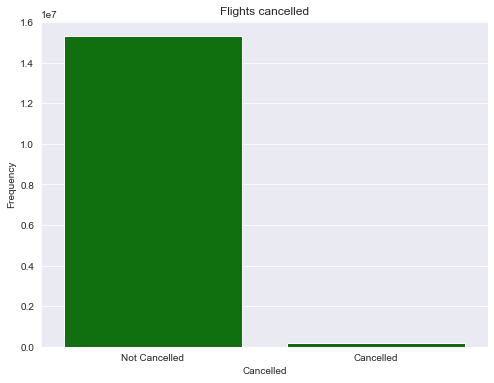

In [37]:
# Number of flights vs cancelled flights
darkgrid()
# Cancelled flights
plt.figure(figsize=(8,6))

# Plot barchart
x = sns.countplot(data=df,x='Cancelled', color='green')

# labels
ticks = np.arange(0,25e5+25e4,25e4)
plt.ylabel('Frequency')
plt.xlabel('Cancelled')
x.set_xticklabels(['Not Cancelled', 'Cancelled']) # custom x labels
plt.title('Flights cancelled')

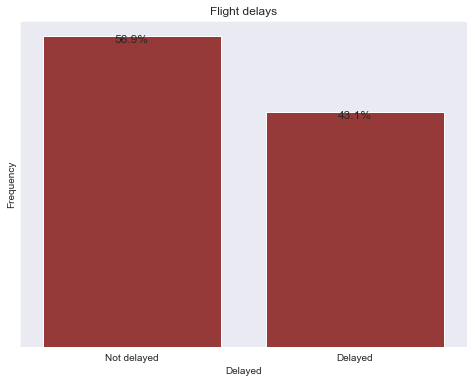

In [38]:
# Proportion of flights delayed

# flights delayed count

# Plot graph
plt.figure(figsize=(8,6))

x = sns.countplot(data=df,x='delayed',color='brown')

# Labels
plt.xlabel('Delayed')
plt.ylabel('Frequency')
plt.yticks([])
plt.title('Flight delays')
x.set_xticklabels(['Not delayed','Delayed'])

# percentage counts on bars
delay_count = df.delayed.value_counts()
for i in range (delay_count.shape[0]):
    count = delay_count[i]
    pc_count= str(round(delay_count[i]/delay_count.sum()*100,1))+('%')
    plt.text(i,count+40000,pc_count,ha='center',va='top',size=12);

In [39]:
# Comparing the distribution of arrival and departure delay times

print('The minimum departure delay is ' + str(int(df.DepDelay.min())) + ' minutes.')
print('The maximum departure delay is ' + str(int(df.DepDelay.max())) + ' minutes.')

print('The minimum arrival delay is ' + str(int(df.ArrDelay.min())) + ' minutes.')
print('The maximum arrival delay is ' + str(int(df.ArrDelay.max())) + ' minutes.')

The minimum departure delay is -1345 minutes.
The maximum departure delay is 1646 minutes.
The minimum arrival delay is -1437 minutes.
The maximum arrival delay is 1438 minutes.


## Some flights departed early and whilst some flights arrived early. Below are two histograms, these show the difference in the scheduled and actual times for departures and arrivals.

Text(0.5, 1.0, 'Departure Delays')

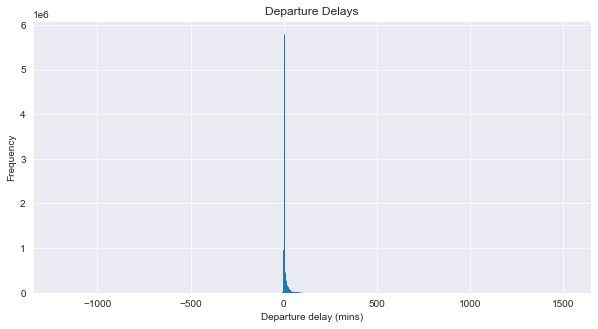

In [40]:
plt.figure(figsize=(10,5))
# flight departure delays
bins = np.arange(df.DepDelay.min()-1,df.DepDelay.max()+1,1)

# Plotting flight departure delays
plt.xlim(df.DepDelay.min()-1,df.DepDelay.max()+1)

# plot graph
base_colour = sns.color_palette()[0]
plt.hist(data=df,x='DepDelay',bins=bins,ec=base_colour,color=base_colour)

# Labels
plt.xlabel('Departure delay (mins)')
plt.ylabel('Frequency')
plt.title('Departure Delays')

Text(0.5, 1.0, 'Arrival Delays')

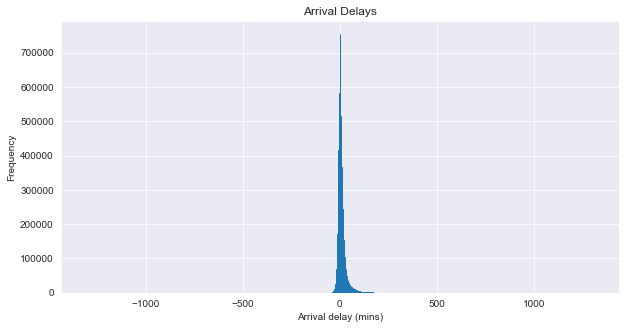

In [41]:
plt.figure(figsize=(10,5))
# flight arrival delays
bins = np.arange(df.ArrDelay.min()-1,df.ArrDelay.max()+1,1)

#set limits and axis
plt.xlim(df.ArrDelay.min()-1,df.ArrDelay.max()+1)
#tick_locs = np.arange(0,180000+20000,20000)
#plt.yticks(tick_locs)

# plot graph
plt.hist(data=df,x='ArrDelay',bins=bins,ec=base_colour,color=base_colour)

# Labels
plt.xlabel('Arrival delay (mins)')
plt.ylabel('Frequency')
plt.title('Arrival Delays')

Text(0.5, 1.0, 'Arrival delays')

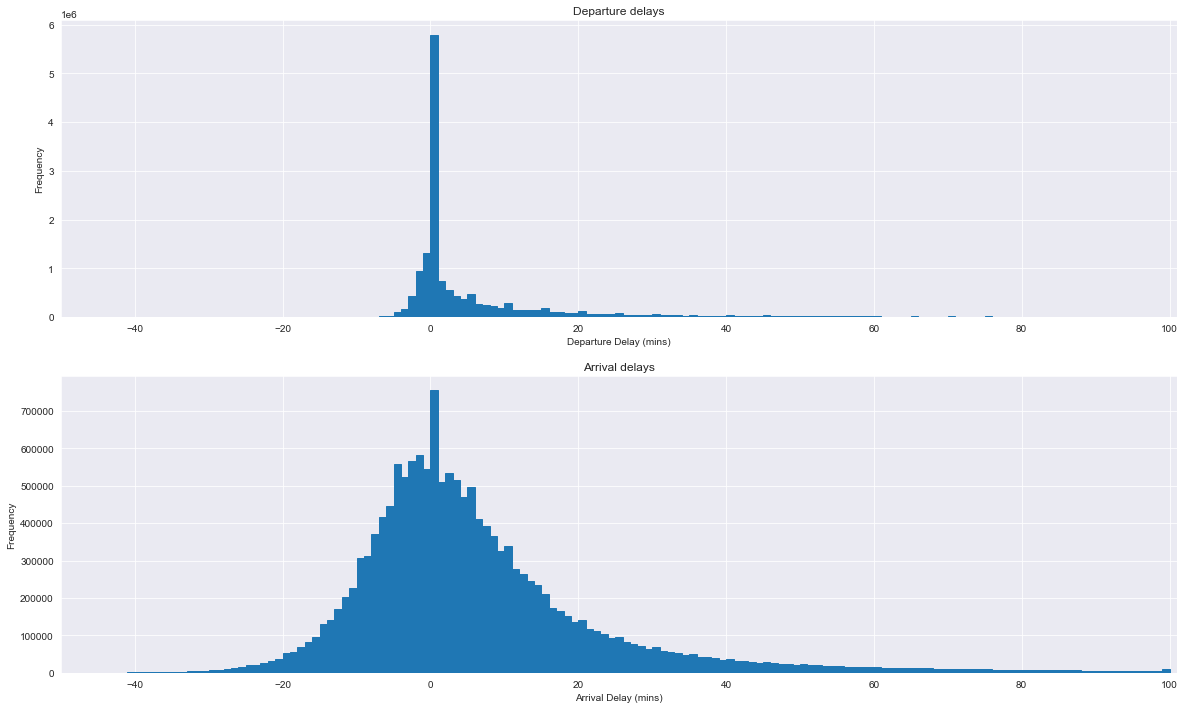

In [42]:
# Comparing departure and arrival delay times
plt.figure(figsize = (20, 12))

bins = np.arange(-50,100+1,1) # Select bin size

# plot departure delay times
plt.subplot(2,1,1)
plt.hist(data=df,x='DepDelay',bins=bins,ec=base_colour,color=base_colour)
# set labels and axes
plt.xlim(-50,100+1)
plt.ylabel('Frequency')
plt.xlabel('Departure Delay (mins)')
plt.title('Departure delays')

# plot arrival delay times
plt.subplot(2,1,2)
plt.hist(data=df,x='ArrDelay',bins=bins,ec=base_colour,color=base_colour)
# set labels and axes
plt.xlim(-50,100+1)
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (mins)')
plt.title('Arrival delays')

## Examining the distribution of diverted flights.

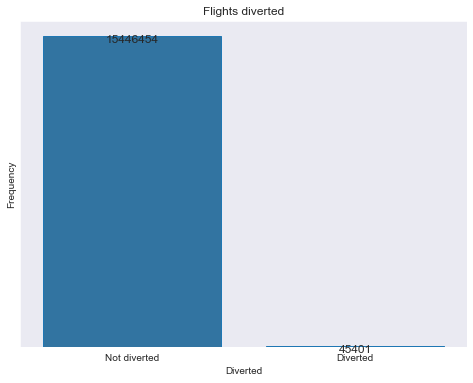

In [43]:
plt.figure(figsize=(8,6))

# Plot barchart
x = sns.countplot(data=df,x='Diverted',ec=base_colour)

# labels
ticks = np.arange(0,25e5+25e4,25e4)
plt.yticks(ticks,['0','250K','500K','750K','1M','1.25M','1.5M','1.75M','2M','2.25M','2.5M'])
plt.ylabel('Frequency')
plt.yticks([])
plt.xlabel('Diverted')
x.set_xticklabels(['Not diverted','Diverted'])
plt.title('Flights diverted')

# value counts on bars
diverted_count = df.Diverted.value_counts()
for i in range (diverted_count.shape[0]):
    count = diverted_count[i]
    plt.text(i,count+80000,count,ha='center',va='top',size=12)

## Examining the distribution of flights grouped by day of the week

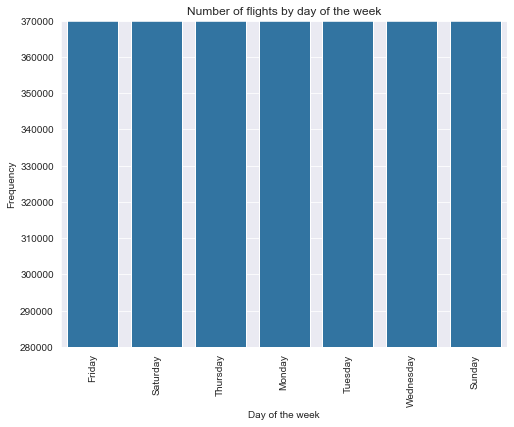

In [44]:
# Plot graph
plt.figure(figsize=(8,6))
base_colour = sns.color_palette()[0]
sns.countplot(data=df,x='DayOfWeek',color=base_colour)

# Labels
tick_locs = np.arange(270000,df['DayOfWeek'].value_counts().values.max()+10000,10000)
plt.xticks(rotation=90)
plt.yticks(tick_locs) # set y ticks
plt.ylim([28e4,37e4]) # set y axis limits
plt.xlabel('Day of the week')
plt.ylabel('Frequency')
plt.title('Number of flights by day of the week');

## Comparing flights per month

Text(0.5, 1.0, 'Number of flights by month')

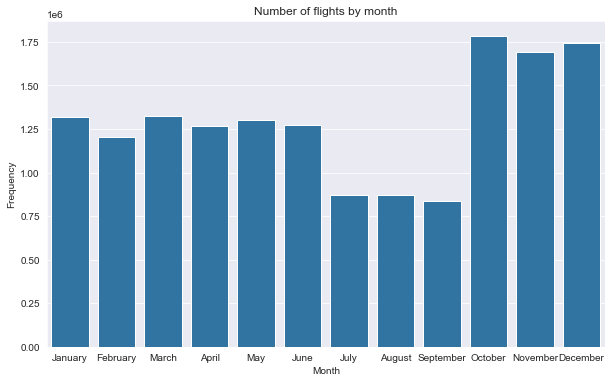

In [45]:
# Plot graph
plt.figure(figsize=(10,6))
base_colour = sns.color_palette()[0]
x = sns.countplot(data=df,x='Month',color=base_colour)

# Labels
#tick_locs = np.arange(0,df['Month'].value_counts().values.max()+50000,50000)
#plt.yticks(tick_locs) # set y ticks # set y axis limits
plt.xlabel('Month')
plt.ylabel('Frequency')
x.set_xticklabels(['January','February','March','April', 'May','June','July','August','September','October','November','December'])
plt.title('Number of flights by month')

## Comparing flight distances

In [46]:
# Find the min and max flight distances
df.Distance.describe()

count    1.549186e+07
mean     6.141145e+02
std      5.096990e+02
min      0.000000e+00
25%      2.580000e+02
50%      4.460000e+02
75%      8.340000e+02
max      4.983000e+03
Name: Distance, dtype: float64

(5.0, 5000.0)

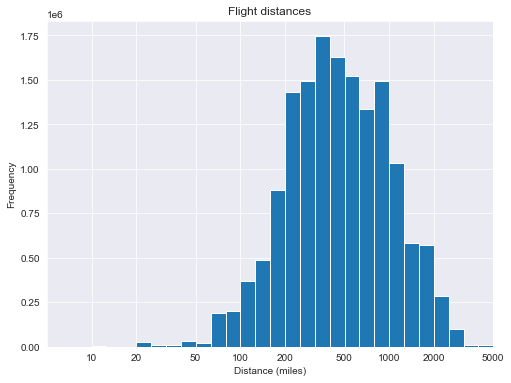

In [47]:
# Flight distances

# Select bin size
bins = 10 ** np.arange(-1,3.7+0.1,0.1)

# Plot graph
plt.figure(figsize=(8,6))
plt.hist(data=df,x='Distance', bins=bins)

# set x axis scale
plt.xscale('log')

# set x and y axis labels (custom)
x_ticks = [10,20,50,100,200,500,1000,2000,5000]
x_labels = ['{}'.format(v) for v in x_ticks]
#y_ticks = np.arange(0,3e5+5e4,5e4)
y_labels = ['0','50K','100K','150K','200K','250K','300K']

# Labels and title
plt.xticks(x_ticks,x_labels)
plt.title('Flight distances')
plt.ylabel('Frequency')
plt.xlabel('Distance (miles)')
plt.xlim(5,5000)

# Bivariate Analysis

In [48]:
df.info(verbose=True, null_counts=True)

/var/folders/rw/w8zrfd114mq4bld0cqdkdg6w0000gn/T/ipykernel_6317/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491855 entries, 0 to 5491854
Data columns (total 21 columns):
 #   Column                    Non-Null Count     Dtype  
---  ------                    --------------     -----  
 0   Year                      15491855 non-null  int64  
 1   Month                     15491855 non-null  int64  
 2   DayofMonth                15491855 non-null  int64  
 3   DayOfWeek                 15491855 non-null  object 
 4   FlightDate                15491855 non-null  object 
 5   DOT_ID_Reporting_Airline  15491855 non-null  int64  
 6   OriginAirportID           15491855 non-null  int64  
 7   DestAirportID             15491855 non-null  int64  
 8   CRSDepTime                15491855 non-null  object 
 9   DepTime                   15491855 non-null  object 
 10  DepDelay                  15491855 non-null  float64
 11  CRSArrTime                15491855 non-null  object 
 12  ArrTime                   15491855 non-null  object 
 13  ArrDelay   

In [49]:
# numeric variables 
numeric_vars =['ActualElapsedTime', 'ArrDelay', 'DepDelay', 'Distance',]

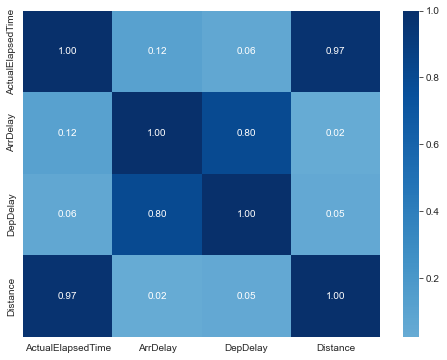

In [50]:
# correlation plot

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_vars].corr(),annot=True, fmt='.2f',cmap='Blues',center=0)
plt.show()

In [51]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,...,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance,delayed
0,1987,10,30,Friday,1987-10-30,19391,13796,10800,09:37,09:36,...,10:40,10:46,6.0,0,Not Diverted,63.0,70.0,1.0,325.0,0
1,1987,10,31,Saturday,1987-10-31,19391,13796,10800,09:37,09:36,...,10:40,10:46,6.0,0,Not Diverted,63.0,70.0,1.0,325.0,0
2,1987,10,1,Thursday,1987-10-01,19391,10800,14831,08:55,0n:an,...,09:58,10:02.5,3.5,1,Not Diverted,63.0,65.5,1.0,297.0,1
3,1987,10,2,Friday,1987-10-02,19391,10800,14831,08:55,08:58,...,09:58,09:59,1.0,0,Not Diverted,63.0,61.0,1.0,297.0,1
4,1987,10,3,Saturday,1987-10-03,19391,10800,14831,08:55,08:59,...,09:58,09:59,1.0,0,Not Diverted,63.0,60.0,1.0,297.0,1


# MultiVariate Analysis

In [52]:
#Number of cancelled flights by day of the week categorised by month

In [53]:
df.replace("1", "Cancelled", inplace=True)
df.replace("0", "Not Cancelled", inplace=True)

In [54]:
# replacing 'day of week' values
day = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df['DayOfWeek'].replace(day, inplace=True)

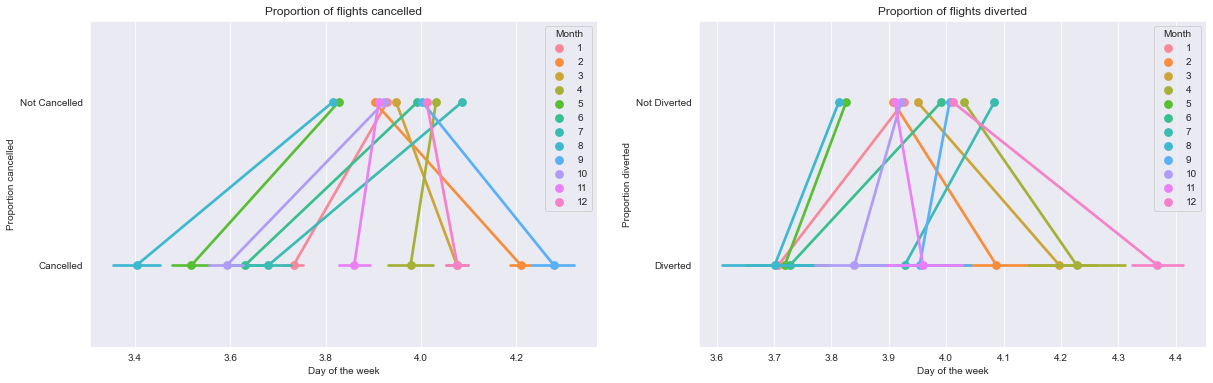

In [55]:
darkgrid()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.pointplot(data=df,x='DayOfWeek',y='Cancelled',hue='Month')
plt.xlabel('Day of the week')
plt.ylabel('Proportion cancelled')
plt.title('Proportion of flights cancelled')

plt.subplot(1,2,2)
sns.pointplot(data=df,x='DayOfWeek',y='Diverted',hue='Month')
plt.xlabel('Day of the week')
plt.ylabel('Proportion diverted')
plt.title('Proportion of flights diverted');

# Model Building

In [58]:
# To run a data more than 5GB we need GPU's. Since it is not supported in my system. I am using one of the chunk sizes

In [87]:
df3 = pd.concat([df1,df2])

In [88]:
df3.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491855 entries, 0 to 5491854
Data columns (total 49 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   Reporting_Airline                object 
 7   DOT_ID_Reporting_Airline         int64  
 8   IATA_CODE_Reporting_Airline      object 
 9   Flight_Number_Reporting_Airline  int64  
 10  OriginAirportID                  int64  
 11  OriginAirportSeqID               int64  
 12  OriginCityMarketID               int64  
 13  Origin                           object 
 14  OriginCityName                   object 
 15  OriginState                      object 
 16  OriginStateFips                  float64
 17  OriginS

In [60]:
df1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 49 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   Reporting_Airline                object 
 7   DOT_ID_Reporting_Airline         int64  
 8   IATA_CODE_Reporting_Airline      object 
 9   Flight_Number_Reporting_Airline  int64  
 10  OriginAirportID                  int64  
 11  OriginAirportSeqID               int64  
 12  OriginCityMarketID               int64  
 13  Origin                           object 
 14  OriginCityName                   object 
 15  OriginState                      object 
 16  OriginStateFips                  float64
 17  OriginS

In [89]:
df3 = df3.drop(columns=['FlightDate','Quarter', 'Reporting_Airline',
                 'IATA_CODE_Reporting_Airline','Flight_Number_Reporting_Airline',
                 'Origin','OriginAirportSeqID','OriginCityMarketID',
                 'OriginCityName','OriginState','OriginStateFips','OriginStateName',
                 'OriginWac','Dest','DestAirportSeqID','DestCityMarketID',
                 'DestCityName','DestState','DestStateFips','DestStateName','DestWac',
                 'DepDelayMinutes','DepDel15','DepartureDelayGroups','DepTimeBlk',
                 'ArrDelayMinutes','ArrDel15','ArrivalDelayGroups','ArrTimeBlk','DistanceGroup'])

In [90]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15491855 entries, 0 to 5491854
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   Month                     int64  
 2   DayofMonth                int64  
 3   DayOfWeek                 int64  
 4   DOT_ID_Reporting_Airline  int64  
 5   OriginAirportID           int64  
 6   DestAirportID             int64  
 7   CRSDepTime                int64  
 8   DepTime                   float64
 9   DepDelay                  float64
 10  CRSArrTime                int64  
 11  ArrTime                   float64
 12  ArrDelay                  float64
 13  Cancelled                 float64
 14  Diverted                  float64
 15  CRSElapsedTime            float64
 16  ActualElapsedTime         float64
 17  Flights                   float64
 18  Distance                  float64
dtypes: float64(10), int64(9)
memory usage: 2.3 GB


In [91]:
df3.shape

(15491855, 19)

In [92]:
df3.isnull().sum()

Year                             0
Month                            0
DayofMonth                       0
DayOfWeek                        0
DOT_ID_Reporting_Airline         0
OriginAirportID                  0
DestAirportID                    0
CRSDepTime                       0
DepTime                     186822
DepDelay                    186822
CRSArrTime                       0
ArrTime                     232223
ArrDelay                    232223
Cancelled                        0
Diverted                         0
CRSElapsedTime                   0
ActualElapsedTime           232223
Flights                          0
Distance                         0
dtype: int64

In [93]:
df3 = df3.dropna()

In [94]:
df3.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DOT_ID_Reporting_Airline    0
OriginAirportID             0
DestAirportID               0
CRSDepTime                  0
DepTime                     0
DepDelay                    0
CRSArrTime                  0
ArrTime                     0
ArrDelay                    0
Cancelled                   0
Diverted                    0
CRSElapsedTime              0
ActualElapsedTime           0
Flights                     0
Distance                    0
dtype: int64

In [95]:
df3['CRSDepTime'] = np.ceil(df3['CRSDepTime']/600).apply(int)
df3['CRSArrTime'] = np.ceil(df3['CRSArrTime']/600).apply(int)

In [96]:
df3.CRSDepTime.value_counts(normalize=True)

2    0.382121
3    0.381128
4    0.223719
1    0.013032
Name: CRSDepTime, dtype: float64

In [97]:
df3.CRSArrTime.value_counts(normalize=True)

3    0.378553
4    0.322596
2    0.281549
1    0.017302
Name: CRSArrTime, dtype: float64

In [98]:
df3.head()

,Year,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance
0,1987,10,30,5,19391,13796,10800,2,936.0,-1.0,2,1046.0,6.0,0.0,0.0,63.0,70.0,1.0,325.0
1,1987,10,31,6,19391,13796,10800,2,936.0,-1.0,2,1046.0,6.0,0.0,0.0,63.0,70.0,1.0,325.0
3,1987,10,2,5,19391,10800,14831,2,858.0,3.0,2,959.0,1.0,0.0,0.0,63.0,61.0,1.0,297.0
4,1987,10,3,6,19391,10800,14831,2,859.0,4.0,2,959.0,1.0,0.0,0.0,63.0,60.0,1.0,297.0
5,1987,10,5,1,19391,10800,14831,2,854.0,-1.0,2,955.0,-3.0,0.0,0.0,63.0,61.0,1.0,297.0


In [99]:
df3 = df3.drop(['Month'], axis=1)
df3 = df3.drop(['DayofMonth'], axis=1)
df3 = df3.drop(['DayOfWeek'], axis=1)

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15259632 entries, 0 to 5491854
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   DOT_ID_Reporting_Airline  int64  
 2   OriginAirportID           int64  
 3   DestAirportID             int64  
 4   CRSDepTime                int64  
 5   DepTime                   float64
 6   DepDelay                  float64
 7   CRSArrTime                int64  
 8   ArrTime                   float64
 9   ArrDelay                  float64
 10  Cancelled                 float64
 11  Diverted                  float64
 12  CRSElapsedTime            float64
 13  ActualElapsedTime         float64
 14  Flights                   float64
 15  Distance                  float64
dtypes: float64(10), int64(6)
memory usage: 1.9 GB


In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
df3['DOT_ID_Reporting_Airline'] = le.fit_transform(df3['DOT_ID_Reporting_Airline'])

In [102]:
df3.head(2)

,Year,DOT_ID_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,Flights,Distance
0,1987,1,13796,10800,2,936.0,-1.0,2,1046.0,6.0,0.0,0.0,63.0,70.0,1.0,325.0
1,1987,1,13796,10800,2,936.0,-1.0,2,1046.0,6.0,0.0,0.0,63.0,70.0,1.0,325.0


In [103]:
# convert delays to 1 and on time to 0
df3['DELAY_STATUS'] = df3['ArrDelay'].apply(lambda x: 1 if x>0 else 0)

In [104]:
df3['DELAY_STATUS'] = df3['DELAY_STATUS'].astype(int)

In [105]:
X = df3.drop(['DELAY_STATUS','ArrDelay','DepDelay'], axis = 1)
X.shape

(15259632, 14)

In [106]:
y = df3['DELAY_STATUS']
y.head(20)

0     1
1     1
3     1
4     1
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    1
18    0
19    1
20    1
Name: DELAY_STATUS, dtype: int64

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix


# Perform the split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [108]:
#Decision Tree Classifier

In [109]:
# Build a regular tree as baseline
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth= 5, class_weight="balanced")
tree_clf.fit(X_train, y_train)

# Test set predictions
pred = tree_clf.predict(X_test)

print('Testing Accuracy for Decision Tree Classifier:', accuracy_score(y_test, pred))

Testing Accuracy for Decision Tree Classifier: 0.6626509155964866


In [110]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.50      0.57   2031605
           1       0.67      0.79      0.72   2546285

    accuracy                           0.66   4577890
   macro avg       0.66      0.65      0.65   4577890
weighted avg       0.66      0.66      0.65   4577890

